# STAR STAT

modify this notebook to answer questions on errors in HW2

goal is to examine errors in photometry from digital images



In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt          #matplotlib enables plotting routines
from scipy import stats                  # need for linear regression


## DATA 

In [2]:
# load the file stardat.txt into array star, print it
stars = np.loadtxt("stardat.txt")
print(stars)

[[9161. 7142. 4613. 3092. 1053.  537.  276.  144.   59.]
 [8942. 6949. 4459. 2966.  980.  486.  240.  118.   74.]
 [9025. 7022. 4518. 3014. 1008.  506.  254.  128.   66.]
 [9000. 7000. 4500. 3000. 1000.  500.  250.  125.   77.]
 [8907. 6918. 4434. 2946.  969.  478.  234.  114.   80.]
 [9175. 7154. 4624. 3101. 1058.  541.  279.  145.   81.]
 [9049. 7043. 4534. 3028. 1016.  511.  258.  130.   77.]
 [9079. 7069. 4556. 3045. 1026.  518.  263.  134.   80.]
 [9126. 7111. 4589. 3073. 1042.  529.  271.  139.   73.]
 [9029. 7026. 4520. 3017. 1009.  507.  254.  128.   87.]]


In [3]:
# calculate the mean, standard deviation and percent error for stars 1-9
# use these functions: file.mean(axis=0) file.std(axis=0)
mean_star = stars.mean(axis=0)
std_star = stars.std(axis=0)
pe_star = std_star/mean_star
# calculate the log of the mean, standard deviation and percent error for stars 1-9
log_mean = np.log10(mean_star)
log_std = np.log10(std_star)
log_pe = np.log10(pe_star)
print(mean_star[0])

9049.3


## GRAPHS

Text(2, -2, 'slope =-0.495920061961021')

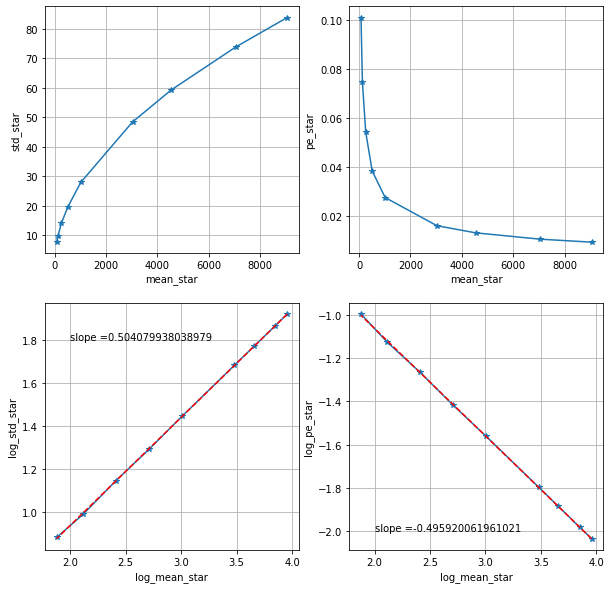

In [4]:
# plot relations for signal, noise, percent error
# use plt.subplot (2,2,n) to put 4 graphs in one figure, qt for external fig
#%matplotlib qt
plt.figure(figsize=(10,10))


plt.subplot(2,2,1)
plt.plot(mean_star,std_star,'*-')
plt.grid()
plt.xlabel('mean_star')
plt.ylabel('std_star')

plt.subplot(2,2,2)
plt.plot(mean_star,pe_star,'*-')
plt.grid()
plt.xlabel('mean_star')
plt.ylabel('pe_star')

plt.subplot(2,2,3)
plt.plot(log_mean,log_std,'*-')
plt.grid()
plt.xlabel('log_mean_star')
plt.ylabel('log_std_star')
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(log_mean, log_std)
line = slope * log_mean + intercept
plt.plot(log_mean,line,'r--')
plt.text(2,1.8,'slope ='+str(slope),size=10)

plt.subplot(2,2,4)
plt.plot(log_mean,log_pe,'*-')
plt.grid()
plt.xlabel('log_mean_star')
plt.ylabel('log_pe_star')
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(log_mean, log_pe)
line = slope * log_mean + intercept
plt.plot(log_mean,line,'r--')
plt.text(2,-2,'slope ='+str(slope),size=10)
#get slope, y intercept for any linear relations, use for best fit line
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#line = slope * x + intercept, add line to linear plots


In [5]:
#calculate Ratio between STAR1 and STAR2
R_A = mean_star[0]
R_B = mean_star[1]
R = R_A/R_B
print("R12 =", R)

std_A = std_star[0]/R_A
std_B = std_star[1]/R_B
std_R = abs(R)*np.sqrt(std_A**2+std_B**2)
print("error12  ", std_R)
print("% error12 =", 100*std_R/R)


R12 = 1.2847914359542265
error12   0.01796640418316319
% error12 = 1.398390717775868


In [6]:
#calculate Ratio between STAR1 and STAR
R_A = mean_star[0]
R_B = mean_star[8]
R = R_A/R_B
print("R19 =", R)

std_A = std_star[0]/R_A
std_B = std_star[8]/R_B
std_R = abs(R)*np.sqrt(std_A**2+std_B**2)
print("error19  ", std_R)
print("% 19 =", 100*std_R/R)

R19 = 120.01724137931032
error19   12.15652475560545
% 19 = 10.128981982834595


In [7]:
print("error in Sobs = ", np.sqrt(200))
print("error in Btot =",np.sqrt(30))
print("error in star =", np.sqrt(14.142*14.142+5.477*5.477))

error in Sobs =  14.142135623730951
error in Btot = 5.477225575051661
error in star = 15.165542951045307
